# New-car

Importation des librairies nécessaires au projet.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# cette option permet de manipuler le dataframe 
pd.options.mode.copy_on_write = True

## 1. Récupération des données et Prévisualisation
1. Importation des données
2. Informations sur le jeu de données
3. Aperçu des données (Head / Tail)

### 1.1 Importation des données

In [3]:
csv = 'csv/carData.csv'
df = pd.read_csv(csv)

### 1.2 Information sur le jeu de données

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


On observe que le jeu de donnée ne contient pas de valeurs manquantes, 301 observations et 9 variables.
On peut également observer qu'il y a 4 variables qualitatives et 5 variables quantitatives.

Les variables qualitatives sont :
- Car_Name (Nominale)
- Fuel_Type (Nominale)
- Seller_Type (Nominale)
- Transmission (Nominale)

Les variables quantitatives sont :
- Year (Discrète)
- Selling_Price (Continue)
- Present_Price (Continue)
- Kms_Driven (Discrète)
- Owner (Discrète)

### 1.3 Aperçu des données (Head / Tail)

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


En jettant un rapide coup d'oeil à notre jeu de données, on observe la présence de véhicules comportant "Royal Enfield" dans la colonne Car_Name (nom de voiture).   
On en fait la compilation ci-dessous :

In [7]:
royal_enfield = df[df['Car_Name'].str.contains('Royal Enfield')]
royal_enfield

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
107,Royal Enfield Thunder 350,2013,1.25,1.50,15000,Petrol,Individual,Manual,0
108,Royal Enfield Thunder 350,2016,1.20,1.50,18000,Petrol,Individual,Manual,0
109,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0
111,Royal Enfield Thunder 350,2016,1.15,1.50,8700,Petrol,Individual,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
115,Royal Enfield Classic 350,2015,1.11,1.47,17500,Petrol,Individual,Manual,0
116,Royal Enfield Classic 350,2013,1.10,1.47,33000,Petrol,Individual,Manual,0
117,Royal Enfield Thunder 500,2015,1.10,1.90,14000,Petrol,Individual,Manual,0


Or, Royal Enfield est une marque de motos britannique, connue pour sa production de motos classiques et rétro.   
Elle ne propose exclusivement que des motos, on peut alors se demander s'il y a d'autres cas similaires et quel pourcentage de nos données représente des voitures ?

Après une investigation poussée, on se rend compte que les noms de motos (toutes marques confondues) ont la particularité commune de commencer par une majuscule.   
On décide alors de les catégoriser à l'aide d'une nouvelle colonne.

In [8]:
# Créer une copie du dataset
ndf = df.copy()

In [9]:
# Créer une colonne Type de véhicule (auto, moto) si le nom du véhicule commence par une majuscule == Moto
ndf['Vehicle_Type'] = ndf['Car_Name'].apply(lambda x: 'Moto' if x[0].isupper() else 'Auto')

In [10]:
moto = ndf[ndf['Vehicle_Type'] == 'Moto']
moto

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Type
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,Moto
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,Moto
102,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,Moto
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,Moto
104,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,Moto
...,...,...,...,...,...,...,...,...,...,...
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,Moto
197,Honda CB twister,2010,0.16,0.51,33000,Petrol,Individual,Manual,0,Moto
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1,Moto
199,Honda CB Shine,2007,0.12,0.58,53000,Petrol,Individual,Manual,0,Moto


In [11]:
print(ndf['Vehicle_Type'].value_counts(normalize=True) * 100)

Auto    66.445183
Moto    33.554817
Name: Vehicle_Type, dtype: float64


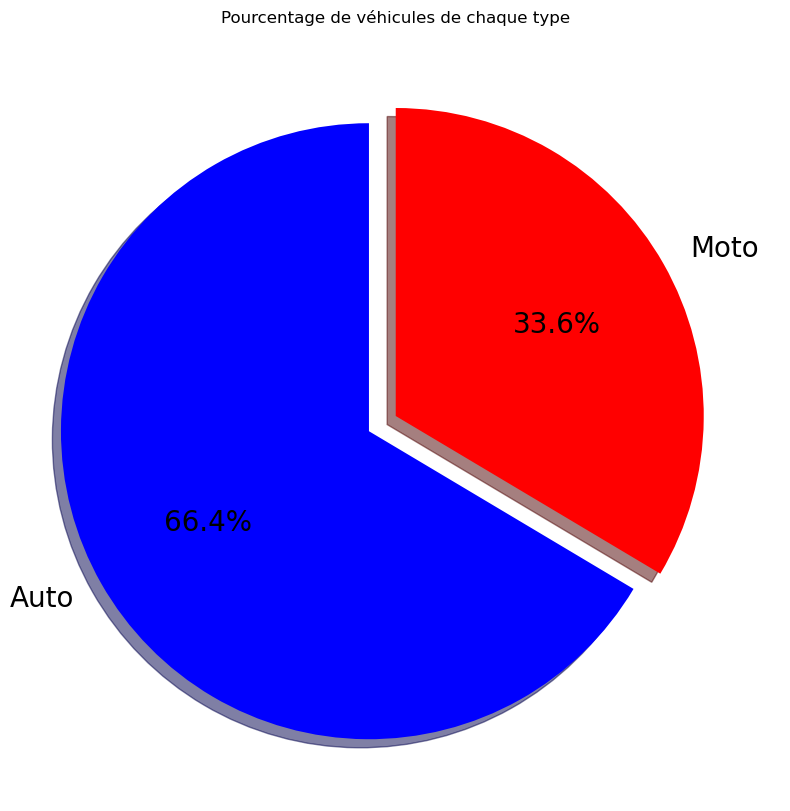

In [12]:
plt.figure(figsize=(10, 10))
ndf['Vehicle_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='bwr', explode=(0.1, 0), shadow=True, pctdistance=0.6, textprops={'fontsize': 20})
plt.title('Pourcentage de véhicules de chaque type')
plt.ylabel('')
plt.show()

On réalise alors qu'un tier de nos données (nos véhicules) sont des motos, or, on comprends très vite que cela sera un problème pour répondre à notre problèmatique initiale qui est d'aider Martin à estimer le prix d'une voiture avec les caractéristiques spécifique q'il a énoncé (cf. Partie 5)

C'est à partir de cette étape que l'on décide de créer un nouveau dataframe, celui-ci ne contiendra que les observations qui nous intéresse; à savoir les observations concernant les voitures.

In [13]:
cars = ndf[ndf['Vehicle_Type'] == 'Auto']
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Auto
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Auto
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Auto
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Auto
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Auto
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Auto
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Auto
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Auto
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Auto


## 2. Exploration des données
1. Quelques statistiques de bases
2. Distribution des données (histogrammes avec matplotlib)

### 2.1 Quelques statistiques de bases (moyenne, médiane, écart-type, etc.)

- jeu de données initial :

In [14]:
ndf.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


- Jeu de données après exclusion des motos :

In [15]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2013.590000,6.691650,10.980750,41404.880000,0.035000
std,2.886792,5.150122,8.879945,27415.814725,0.253171
min,2003.000000,0.350000,2.280000,2071.000000,0.000000
25%,2012.000000,3.637500,6.467500,22332.750000,0.000000
50%,2014.000000,5.250000,8.555000,40000.000000,0.000000
75%,2016.000000,7.562500,13.495000,53513.750000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,3.000000


En comparant rapidement les descriptions des deux jeux de données, on remarque une 1ère abérration :    
un véhicule avec plus de 500 000 km au compteur, véhicule qui s'avère être une moto (un scooter pour être plus précis: Honda Activa 3G) car il n'est plus présent dans le second jeu de données.

### 2.2 Distribution des données (histogrammes avec matplotlib)

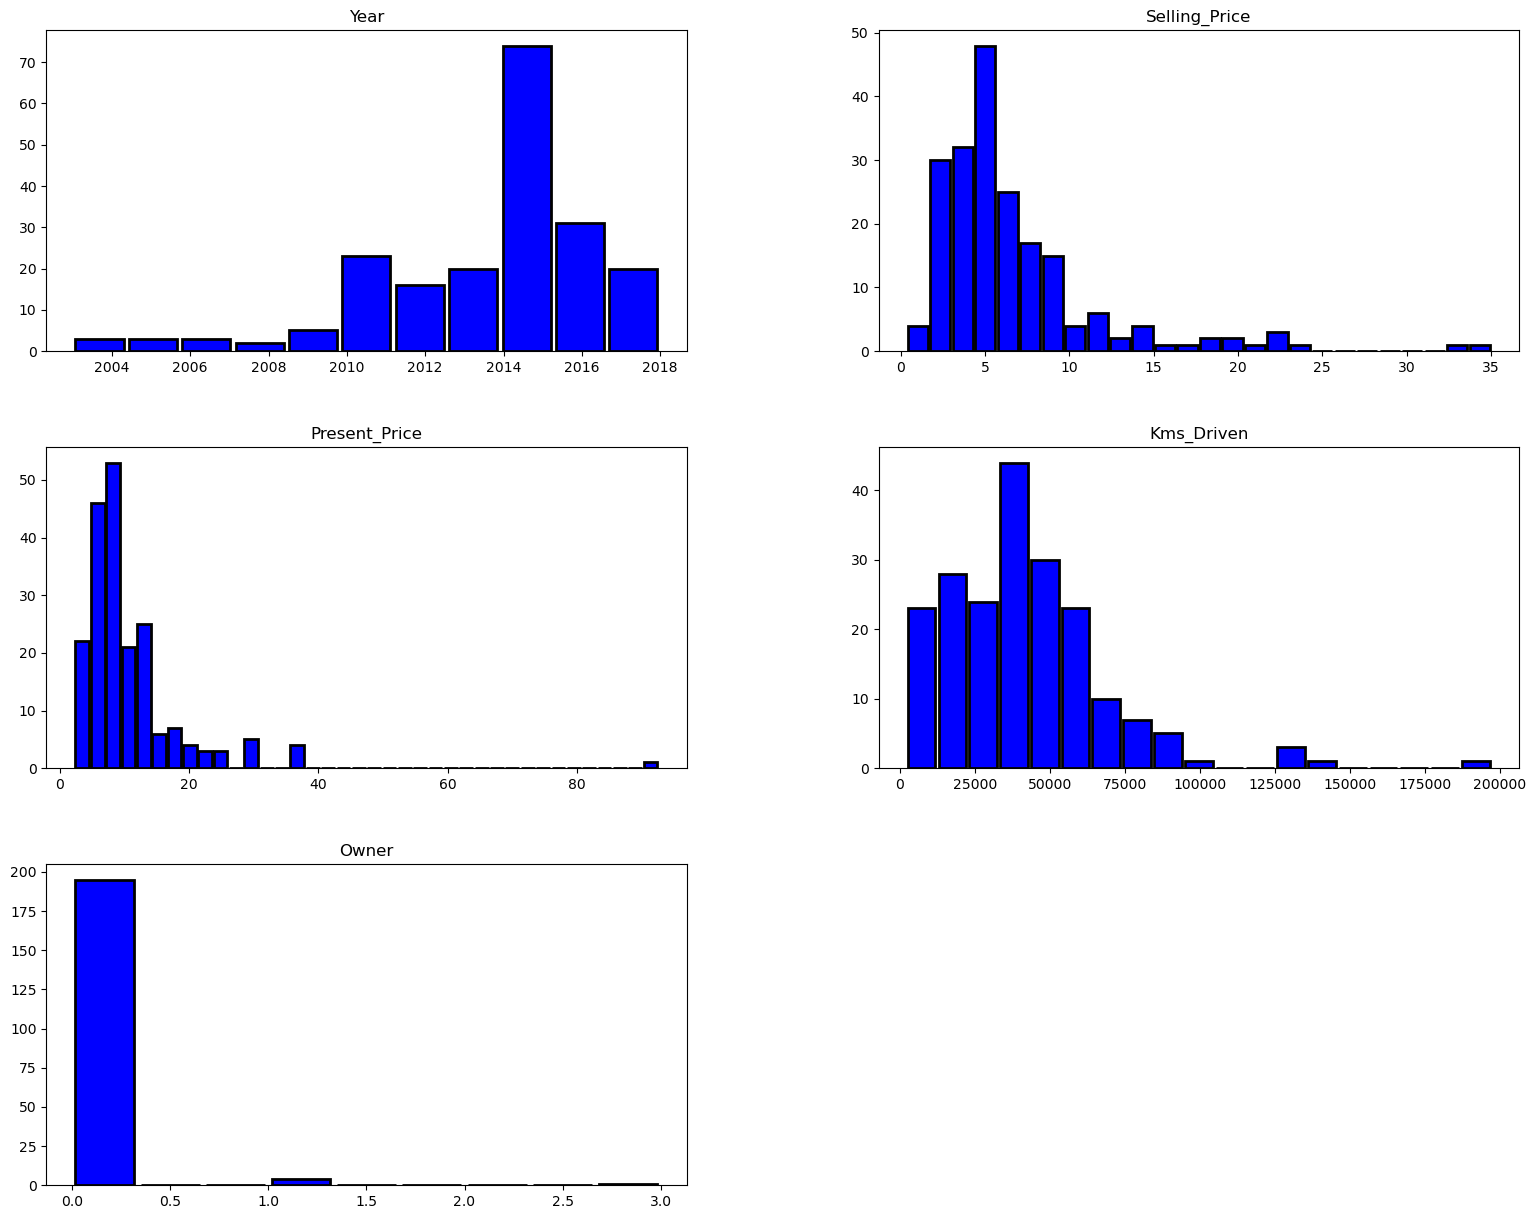

In [16]:
cars.hist(figsize=(19, 15), color='blue', bins='auto', grid=False, layout=(3, 2), edgecolor='black', linewidth=2, zorder=2, rwidth=0.9, histtype='bar', align='mid', orientation='vertical')
plt.show()

# 3. Seaborn & Catplot
    - 1 Visualisation des données à l'aide de seaborn
    - 2 Quelques visualisations à l'aide de catplot
    - 3 Quand utiliser catplot ?

In [17]:
sns.set(style='darkgrid', font_scale=1.5)

In [18]:
"""Ce bloc de code permet de traduire les labels du dataset"""

cars.loc[cars['Transmission'] == 'Manual', 'Transmission'] = 'Manuelle'
cars.loc[cars['Transmission'] == 'Automatic', 'Transmission'] = 'Automatique'

cars.loc[cars['Fuel_Type'] == 'Petrol', 'Fuel_Type'] = 'Essence'
cars.loc[cars['Fuel_Type'] == 'Diesel', 'Fuel_Type'] = 'Diesel'
cars.loc[cars['Fuel_Type'] == 'CNG', 'Fuel_Type'] = 'GNC'

cars.loc[cars['Seller_Type'] == 'Dealer', 'Seller_Type'] = 'Concessionnaire'
cars.loc[cars['Seller_Type'] == 'Individual', 'Seller_Type'] = 'Particulier'

cars.loc[cars['Owner'] == 0, 'Owner'] = 'Première main'
cars.loc[cars['Owner'] == 1, 'Owner'] = 'Deuxième main'
cars.loc[cars['Owner'] == 3, 'Owner'] = 'Troisième main'

### 3.1 Visualisation des données à l'aide de seaborn

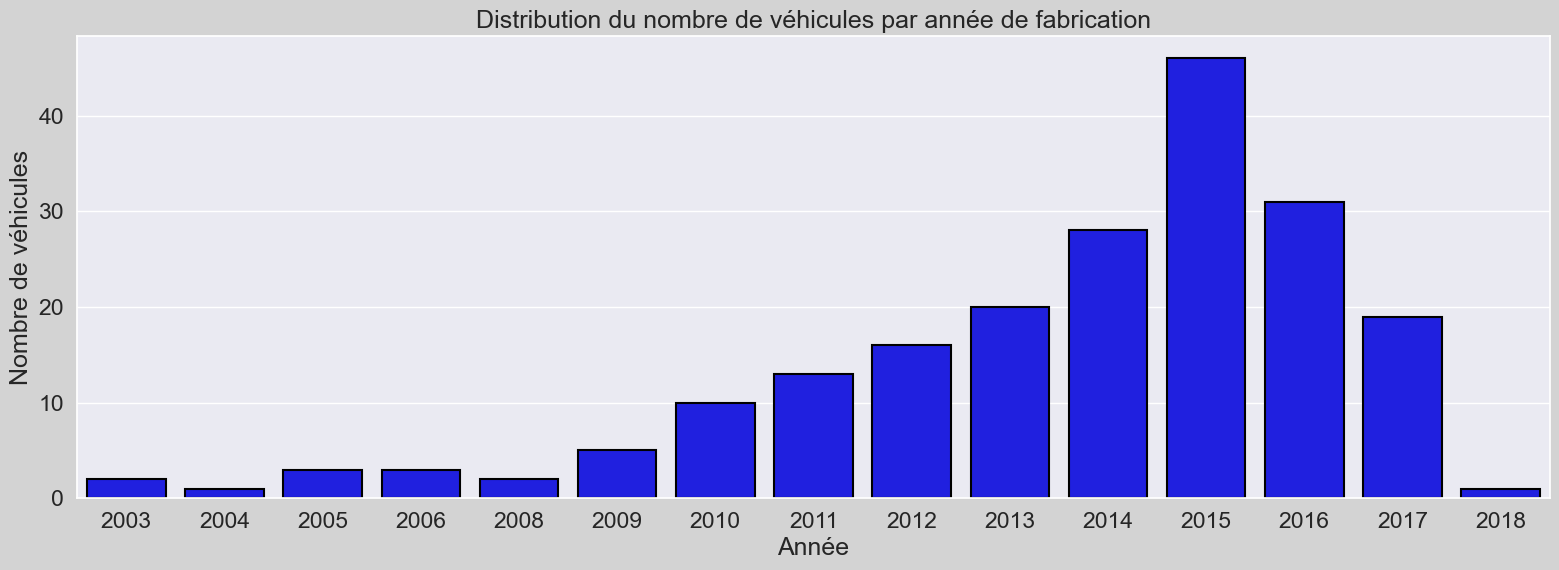

In [19]:
plt.figure(figsize=(19, 6), facecolor='lightgrey', edgecolor='black')
sns.countplot(x='Year', data=cars, color='blue', edgecolor='black', linewidth=1.5)
plt.title('Distribution du nombre de véhicules par année de fabrication')
plt.xlabel('Année')
plt.ylabel('Nombre de véhicules')
plt.show()

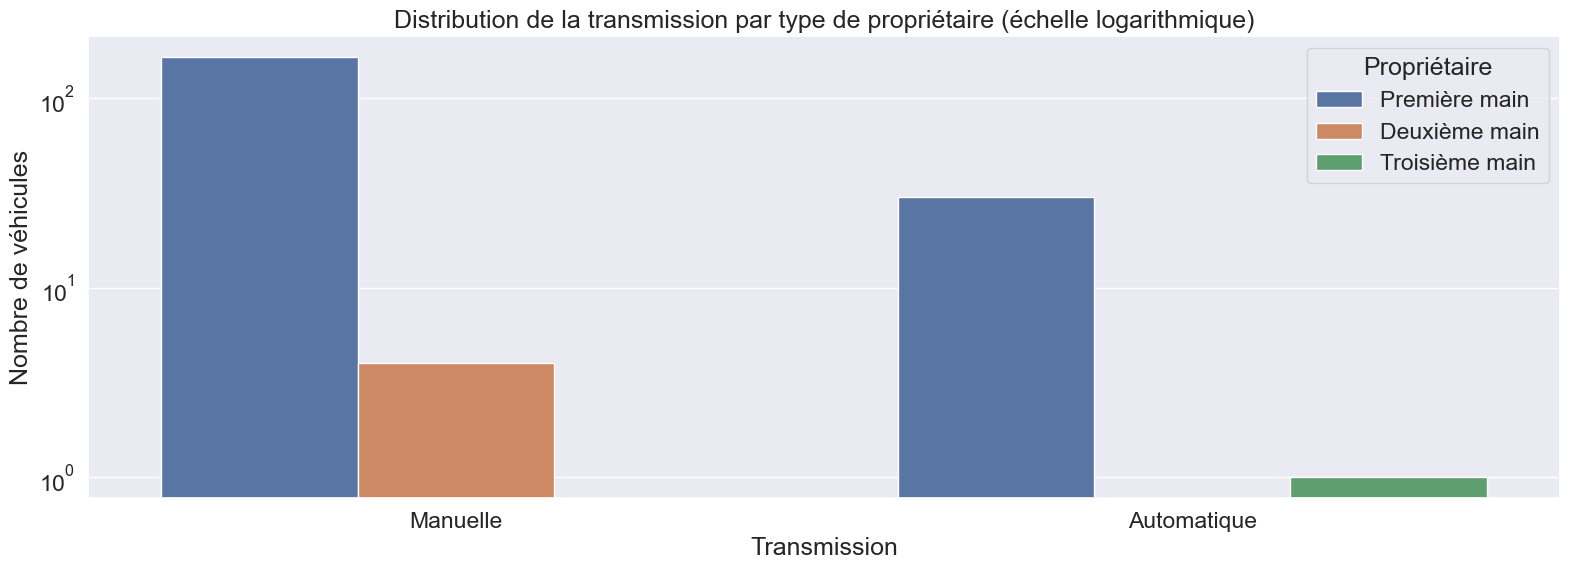

In [20]:
plt.figure(figsize=(19, 6))
sns.countplot(x='Transmission', data=cars, hue='Owner')
plt.title('Distribution de la transmission par type de propriétaire (échelle logarithmique)')
plt.ylabel('Nombre de véhicules')
plt.yscale('log')
plt.legend(title='Propriétaire', labels=['Première main', 'Deuxième main', 'Troisième main'])
plt.show()

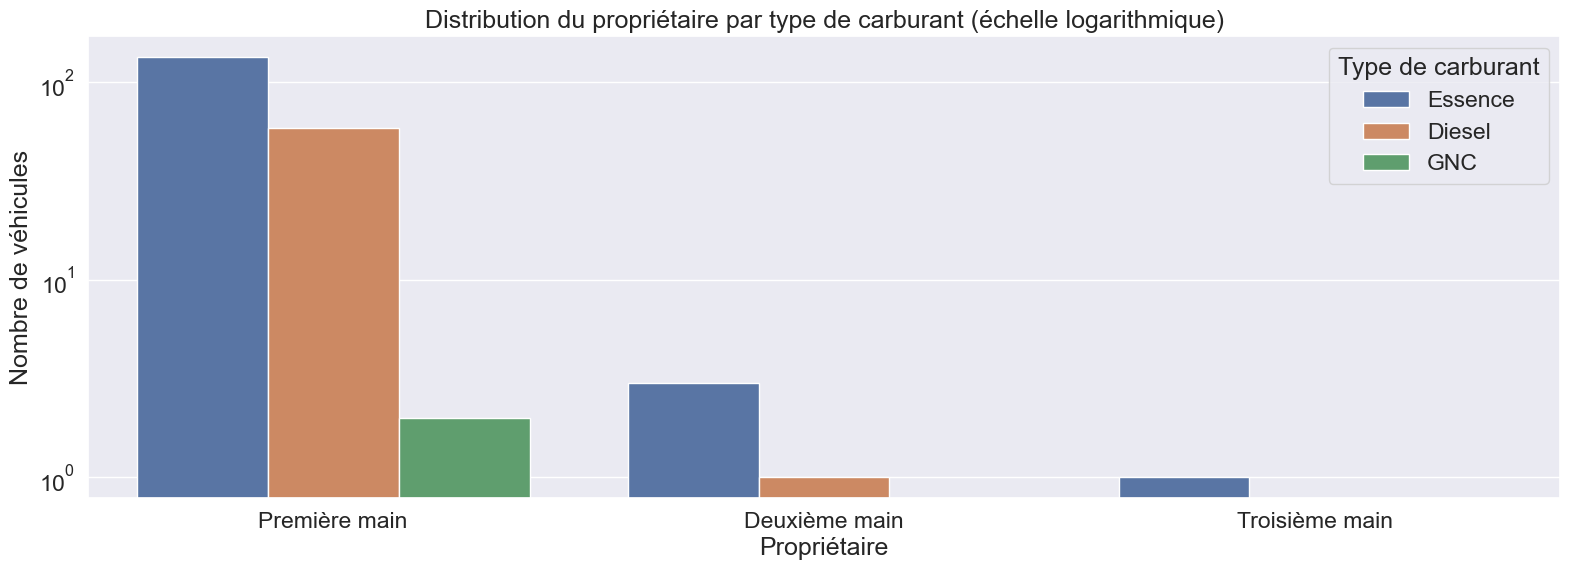

In [21]:
plt.figure(figsize=(19, 6))
sns.countplot(x='Owner', data=cars, hue='Fuel_Type')
plt.title('Distribution du propriétaire par type de carburant (échelle logarithmique)')
plt.ylabel('Nombre de véhicules')
plt.yscale('log')
plt.xlabel('Propriétaire')
plt.legend(title='Type de carburant', labels=['Essence', 'Diesel', 'GNC'])
plt.show()

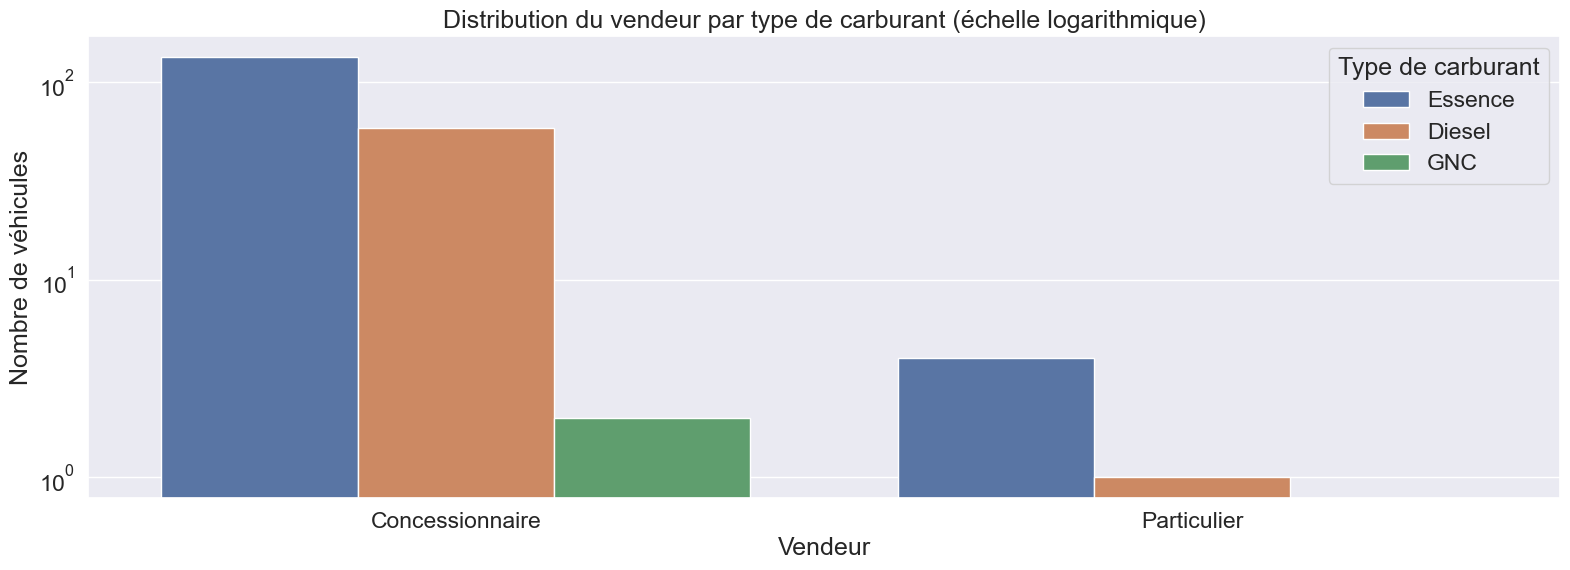

In [22]:
plt.figure(figsize=(19, 6))
sns.countplot(x='Seller_Type', data=cars, hue='Fuel_Type')
plt.title('Distribution du vendeur par type de carburant (échelle logarithmique)')
plt.ylabel('Nombre de véhicules')
plt.xlabel('Vendeur')
plt.yscale('log')
plt.legend(title='Type de carburant', labels=['Essence', 'Diesel', 'GNC'])
plt.show()

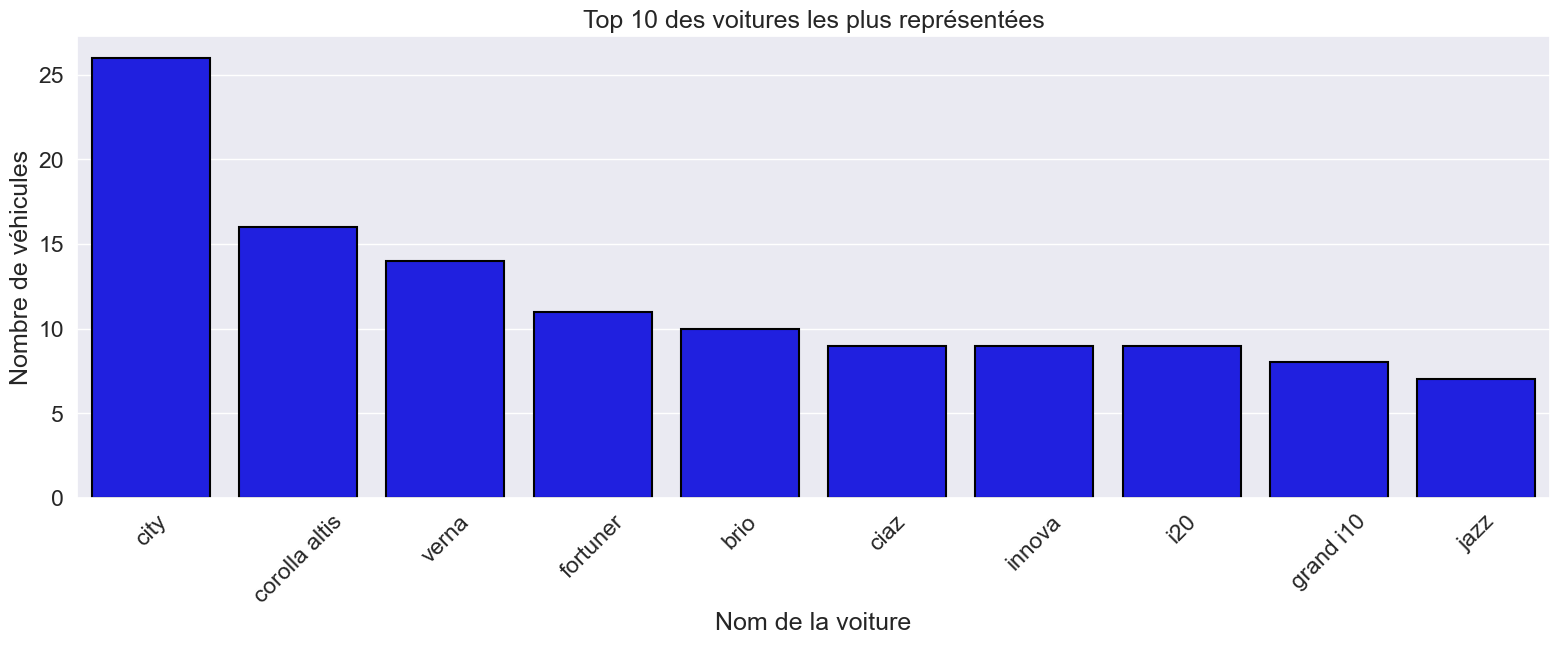

In [23]:
plt.figure(figsize=(19, 6))
sns.countplot(x='Car_Name', data=cars, order=cars['Car_Name'].value_counts().iloc[:10].index, color='blue', edgecolor='black', linewidth=1.5)
plt.title('Top 10 des voitures les plus représentées')
plt.xlabel('Nom de la voiture')
plt.ylabel('Nombre de véhicules')
plt.xticks(rotation=45)
plt.show()

### 3.2 Quelques visualisations à l'aide de catplot

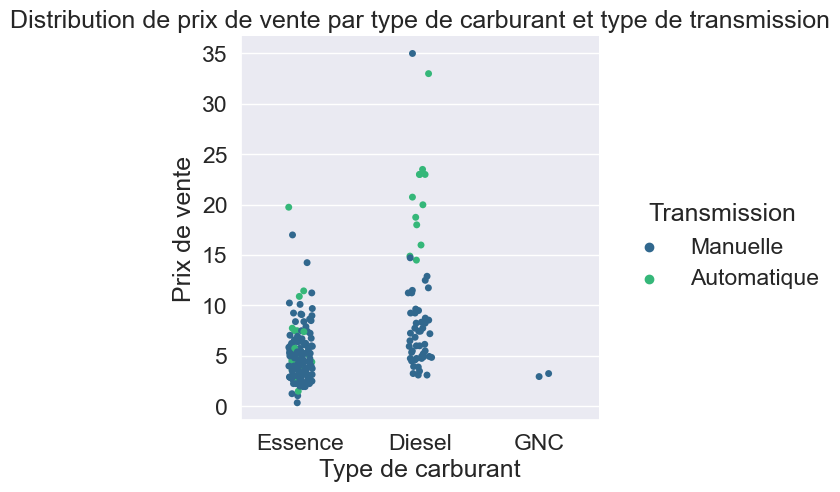

In [24]:
sns.catplot(palette='viridis', x='Fuel_Type', y='Selling_Price', hue='Transmission', data=cars)
plt.title('Distribution de prix de vente par type de carburant et type de transmission')
plt.xlabel('Type de carburant')
plt.ylabel('Prix de vente')
plt.show()

 - remarque ici 2 valeurs (outliers) dont le prix de vente se disctingue de manière significative du nuage de points auquel elles appartiennent.   

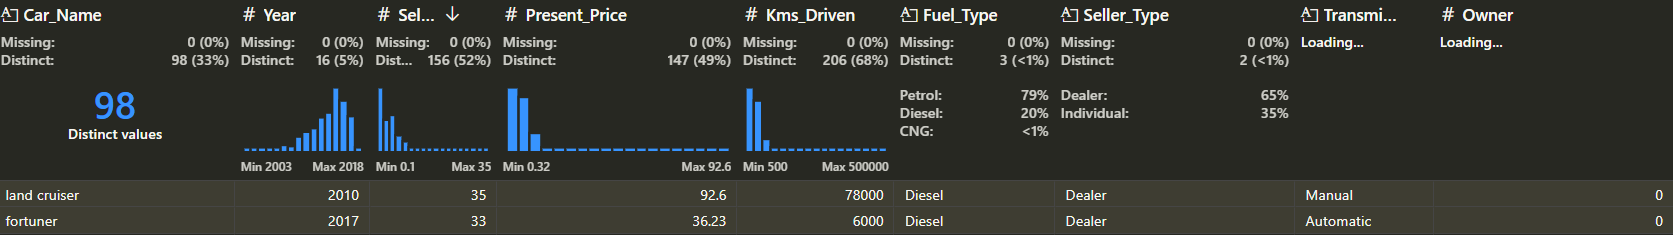

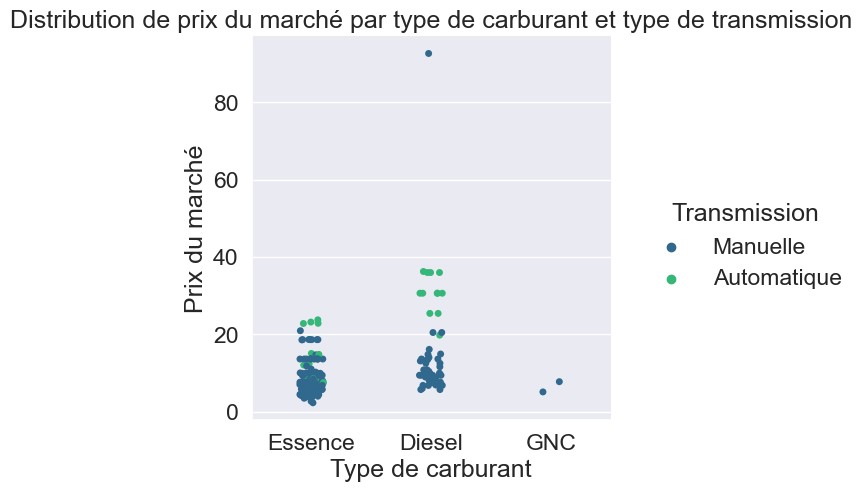

In [25]:
sns.catplot(palette='viridis', x='Fuel_Type', y='Present_Price', hue='Transmission', data=cars)
plt.title('Distribution de prix du marché par type de carburant et type de transmission')
plt.xlabel('Type de carburant')
plt.ylabel('Prix du marché')
plt.show()

- Ici, il n'y en a plus qu'une.

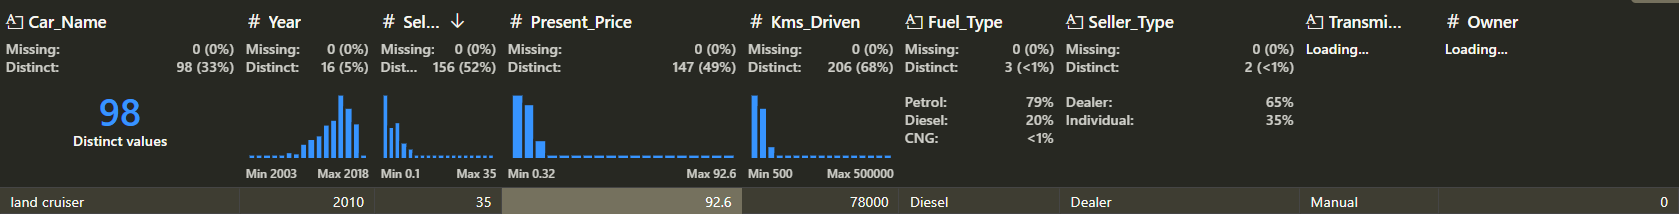

### 3.3 Quand utiliser catplot ?

1. Catplot est utilisé pour tracer des graphiques et pour montrer la relation entre une variable categorielle et une variable numerique.
2. Il est utilisé pour montrer la distribution des observations dans chaque catégorie en utilisant différentes représentations graphiques (violon, boîte à moustaches, barres, ...).
3. Il permet aussi de regrouper les données en fonction d'une ou plusieurs variables catégorielles.

Cas pertinent dans lequel il est intéressant de visaliser les données à l'aide de `catplot` :   
Si vous travaillez avec des données qui impliquent des variables catégorielles telles que les réponses à une enquête, vos meilleurs outils pour visualiser et comparer différentes caractéristiques de vos données seraient les graphiques catégoriels.

# 4. Relation et corélation
    - 1. Quantification de la relation âge / prix de vente
    - 2. Veille sur la régression linéaire
    - 3. Le jeu de donnée est-il adapté à ce type d'algorithme ? (rég. linéaire)
    - 4. Existe-t-il une corrélation linéaire (corrélation de Pearson) entre les variables ? 
    - 5. Visualisation des coéfficient de corrélation (heatmap)

In [26]:
# création d'une nouvelle colonne 'Age' 
cars['Age'] = 2024 - cars['Year']

### 4.1 Quantification de la relation âge / prix de vente

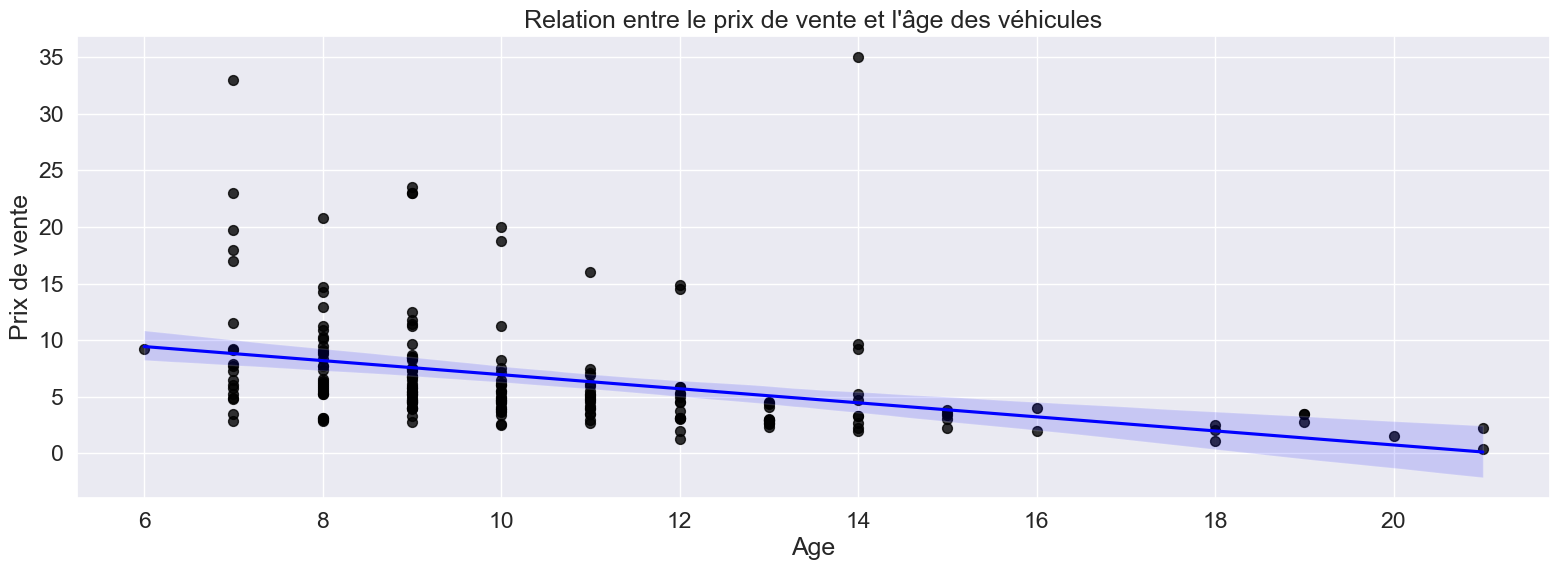

In [27]:
plt.figure(figsize=(19, 6))
sns.regplot(x='Age', y='Selling_Price', data=cars, color='black', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Relation entre le prix de vente et l\'âge des véhicules')
plt.xlabel('Age')
plt.ylabel('Prix de vente')
plt.show()

In [28]:
print(f"Coefficient de corrélation entre le prix de vente et l'âge: {cars['Selling_Price'].corr(cars['Age'])}")

Coefficient de corrélation entre le prix de vente et l'âge: -0.34826127440256144


### 4.2 Veille sur la régression linéaire

## Régression Linéaire

1. Qui et Quand ?   
Le concept de regression linéaire a été introduit par un mathématicien et statisticien britannique nommé Francis Galton (1822 - 1911). Etant cousin de Charles Darwin, il était fortement intéressé par des notions telles que l'hérédité et la génétique. Il cherchait à résoudre des problèmes conncrets tels que: "La taille des parents aide-t-elle à prédire la taille des enfants une fois qu'ils ont atteint l'âge adulte ?"   

Par la suite, d'autres chercheurs ont affiné les méthodes de régression linéaire:   
- Karl Pearson (1857 - 1936) a introduit le coefficient de corrélation de Pearson, un outil fondamental dans l'étude des relations entre variables.   
- Ronald Fisher (1890 - 1962) a contribué à formaliser la régression linéaire. Il a introduit une technique permettant de déduire l'écart type.   
- John Tukey (1915 - 2000) a élaboré des méthodes aidant à diagnostiquer des problèmes dans les modèles de régression linéaire.   

2. Régression linéaire:   
La *régression linéaire, le modèle linéaire* ou encore *le modèle de régression linéaire* est un *modèle de régression* qui cherche à établir une *relation linéaire* entre deux *variables quantitatives*;   
une *variable* dite *expliquée / de réponse* ou encore *variable indépendante* (**qui est expliquée par la théorie ou le modèle que l'on étudie**) habituellement noté **Y** et une ou plusieurs *variables* dites *explicatives* (**elles sont utilisé dans le but d'expliquer, de décrire ou de prédire la ou les variables dépendante(s)**) noté **X**.   

    Lorsque la *dépendance* est exacte, la liaison entre les variables est dite *fonctionnelle*: pour chaque valeur de **X**, il existe une seule valeur possible de **Y**.

    Lorsque la *dépendance* n'est pas exacte, la relation que l'on suppose a priori entre les variables est approximative: c'est dans ce contexte que la régression linéaire apporte des résultats intéressants.

3. Qu'est ce ?   
- L'algorithme de régression linéaire est un **algorithme d'apprentissage supervisé**, c'est-à-dire qu'à partir de la *variable cible* ou de la *variable à expliquer* (**Y**), le modèle à pour but de *faire une prédiction* grâce à des *variables* dites *explicatives* (**X**) ou *prédictives*.   
- Elle modélise mathématiquement la *variable inconnue* ou *dépendante* et la *variable connue* ou *indépendante* sous forme d'une *équation linéaire*.   
- Supposons que nous disposions de données sur nos dépenses et nos revenus de l'année passé.   
- Les techniques de régression linéaire analysent ces données et déterminent que nos dépenses représentent la moité de nos revenus.   
- Ils calculent ensuite une dépense future inconnue en réduisant de moitié un revenu futur connu.   

4. Deux concepts clés:   
Il existe plusieurs concepts clés dans la régression linéaire mais deux sont particulièrement importants:   
  - Coefficient de corrélation: 
    Cette mesure décrit le **degré de relation linéaire entre deux variables**, elle varie entre -1 et 1.

    Il existe trois types de corrélation notable:
      - *Corrélation positive parfaite* (**1**): les deux variables évoluent proportionnellement dans le même sens.    
      - *Corrélation négative parfaite* (**-1**): les deux variables évoluent proportionnellement dans des sens opposés.   
      - *Corrélation nulle* (**0**): il n'existe aucune relation linéaire entre les deux variables.   

  - Ecart type:
    - Cette mesure statistique mesure combien les valeurs d'un ensemble de données sont dispersées autour de la moyenne de l'ensemble.   
    Si l'écart type est faible, cela signifie que les valeurs sont proches de la moyenne (pas de dispersion = pas d'outliers).
    Si l'écart type est élevé, cela signifie que les valeurs sont éloignées de la moyenne.   
    

6. Régression linéaire simple et multivarié:   
Il existe deux types de régressions linéaires:
  - Celle basée sur les relations entre deux variable X et Y (Y étant déduis de X), produit une droite et se voit appelée *régression linéaire simple*.   
  - Celle basée sur plusieurs variable X produit habituellement une courbe. Elle est appelée *régression linéaire multiple*.

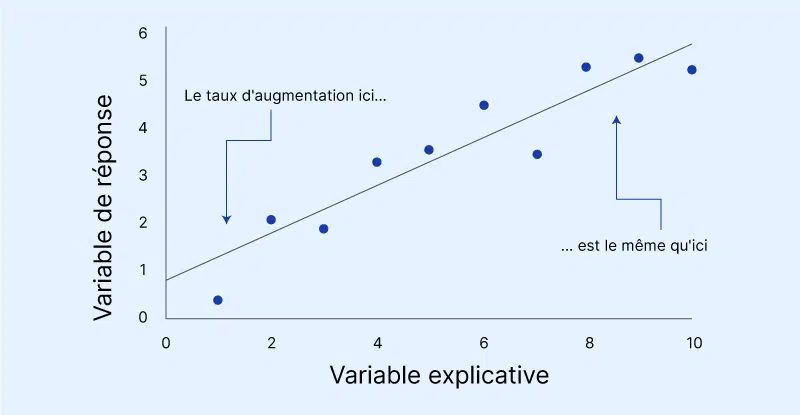

### 4.3 Le jeu de donnée est-il adapté à ce type de d'algorithme ? (rég. linéaire)

Oui, notre jeu de données est bel et bien adapté pour la régression linéaire car :
- il contient des variables numériques
- la variable cible est continue

### 4.4 Existe-t-il une corrélation linéaire (corrélation de Pearson) entre les variables ? 

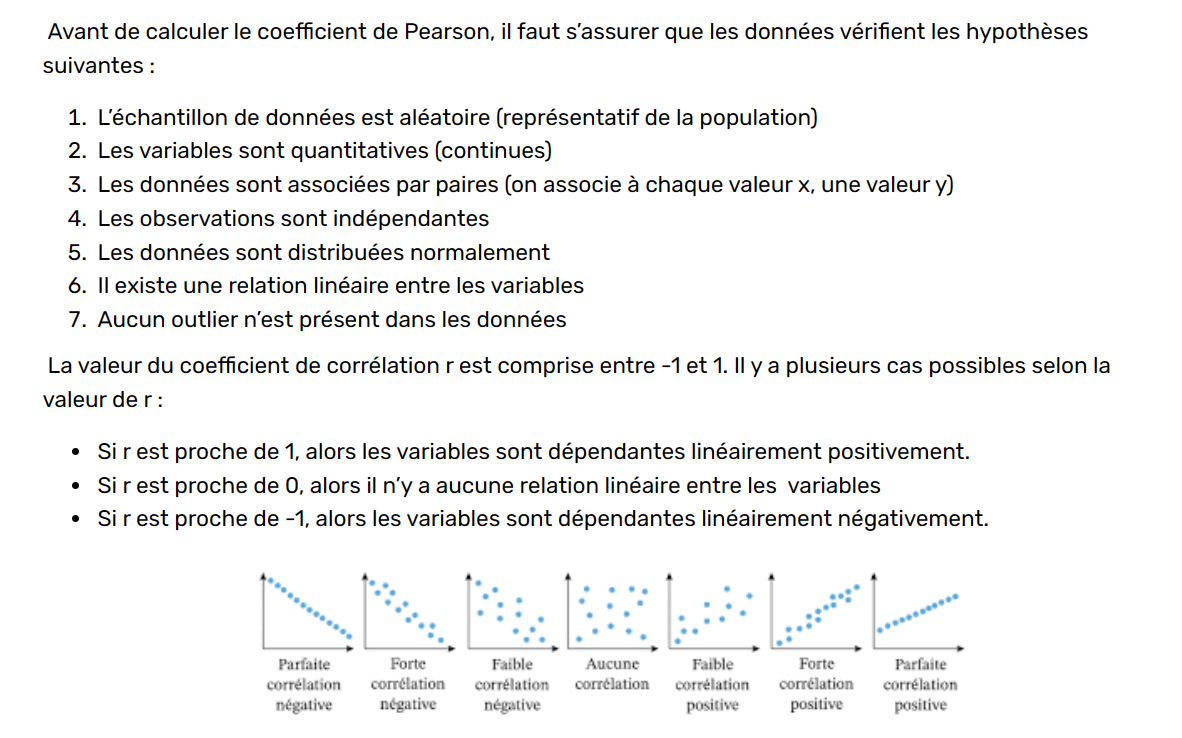   
source : https://datascientest.com/correlations-de-pearson-et-de-spearman

Pour les raisons évoquées ci-dessus, on décide de se débarasser des outliers identifiés lors des visualisations à l'aide de `catplot` (cf. 3.2 Quelques visualisations à l'aide de catplot) 

In [29]:
cars = cars[cars['Selling_Price'] < 30]

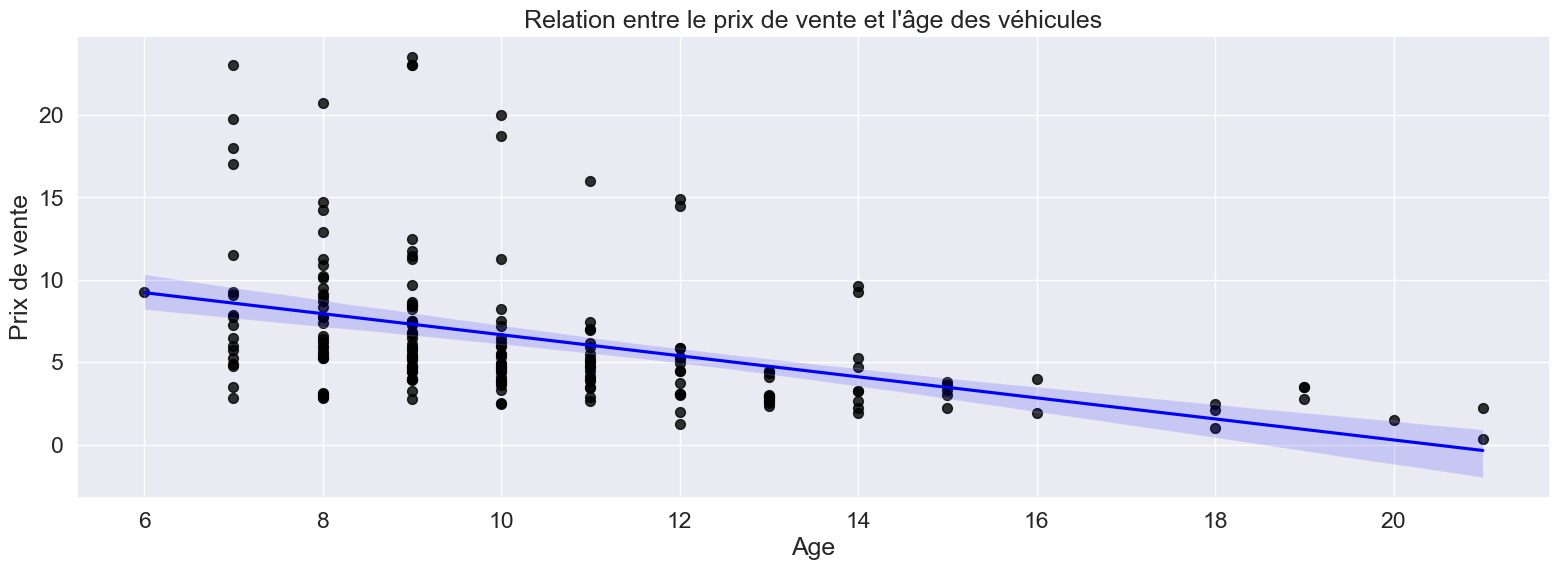

In [30]:
plt.figure(figsize=(19, 6))
sns.regplot(x='Age', y='Selling_Price', data=cars, color='black', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title('Relation entre le prix de vente et l\'âge des véhicules')
plt.xlabel('Age')
plt.ylabel('Prix de vente')
plt.show()

In [31]:
print(f"Coefficient de corrélation entre le prix de vente et l'âge post nettoyage des outliers: {cars['Selling_Price'].corr(cars['Age'])}")

Coefficient de corrélation entre le prix de vente et l'âge post nettoyage des outliers: -0.4199967339902089


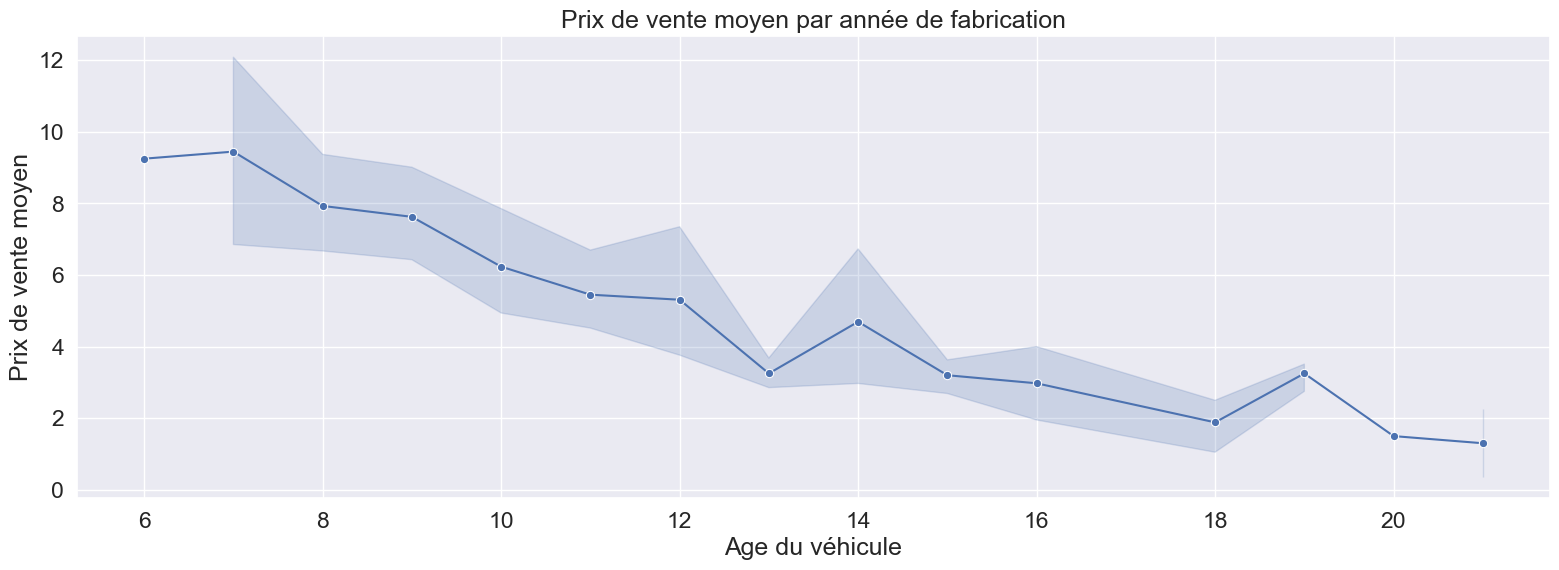

In [32]:
plt.figure(figsize=(19, 6))
sns.lineplot(x='Age', y='Selling_Price', data=cars, estimator=np.mean, marker='o')
plt.title('Prix de vente moyen par année de fabrication')
plt.xlabel('Age du véhicule')
plt.ylabel('Prix de vente moyen')
plt.show()

#### En prenant en compte toutes ces informations, on peut en conclure qu'il y a une relation linéaire négative entre le prix de vente et l'âge des véhicules

On remarque que plus l'âge de la voiture augmente, plus son prix diminue.   
On peut conclure à qu'il existe une corrélation entre ces deux variables.

Dans le cadre de ce projet, il est fort probable qu'une relation linéaire (négative) existe entre l'âge et le prix de vente:

C'est à dire que plus l'âge d'un véhicule augmente (**variable explicative**), plus son prix diminue (**variable expliqué**)

### 4.5 Visualisation des coéfficient de corrélation (heatmap)

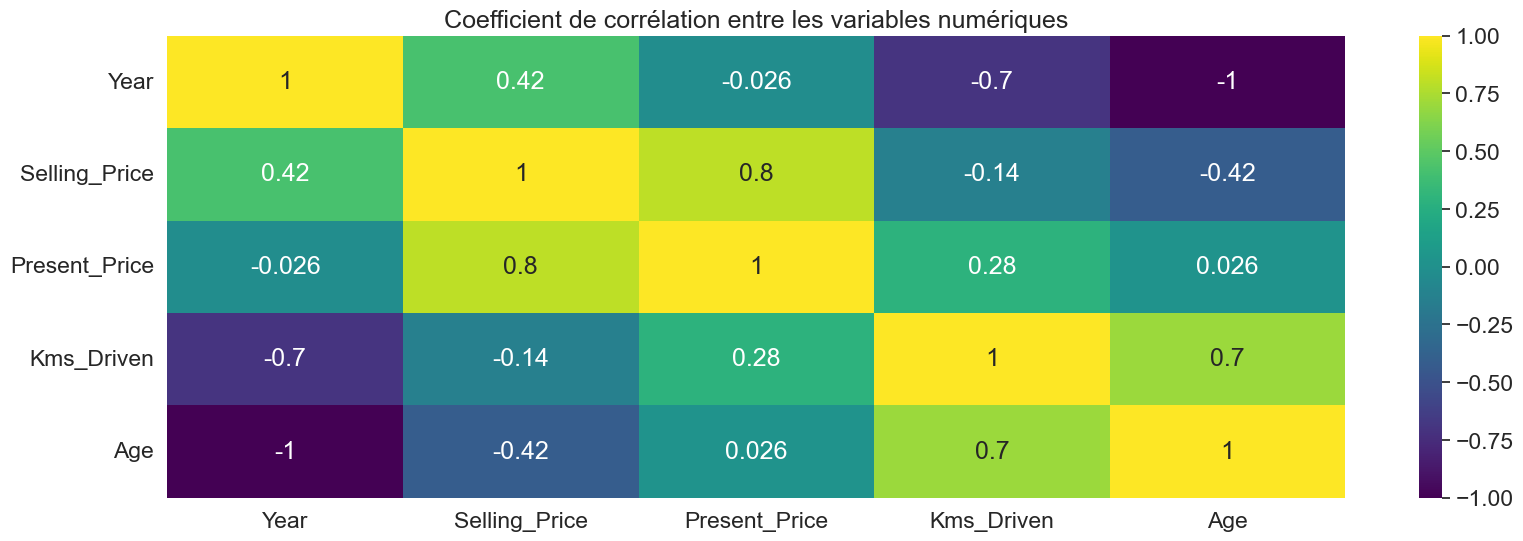

In [33]:
var = cars.select_dtypes(include=[np.number])
plt.figure(figsize=(19, 6))
sns.heatmap(var.corr(), annot=True, cmap='viridis')
plt.title('Coefficient de corrélation entre les variables numériques')
plt.show()

# 5. Algorithmes de regression linéaire univariée
    - 1. Scipy
    - 2. Scikit-learn

### 5.1 Scipy : 

In [34]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(cars['Age'], cars['Selling_Price'])

In [35]:
# afficher les coefficients
print('Pente (slope): ', slope)
print('Ordonnée à l\'origine (intercept): ', intercept)
print('Coefficient de détermination (R-squared): %.2f'
        % r_value**2)
print('Moindre carré (least square): ', np.sqrt(np.mean((intercept + slope*cars['Age'] - cars['Selling_Price'])**2)))
print('Erreur quadratique moyenne (MSE): %.2f'
      % mean_squared_error(cars['Selling_Price'], slope*cars['Age'] + intercept))

Pente (slope):  -0.6379543747391848
Ordonnée à l'origine (intercept):  13.056333163320502
Coefficient de détermination (R-squared): 0.18
Moindre carré (least square):  3.9598424538257557
Erreur quadratique moyenne (MSE): 15.68


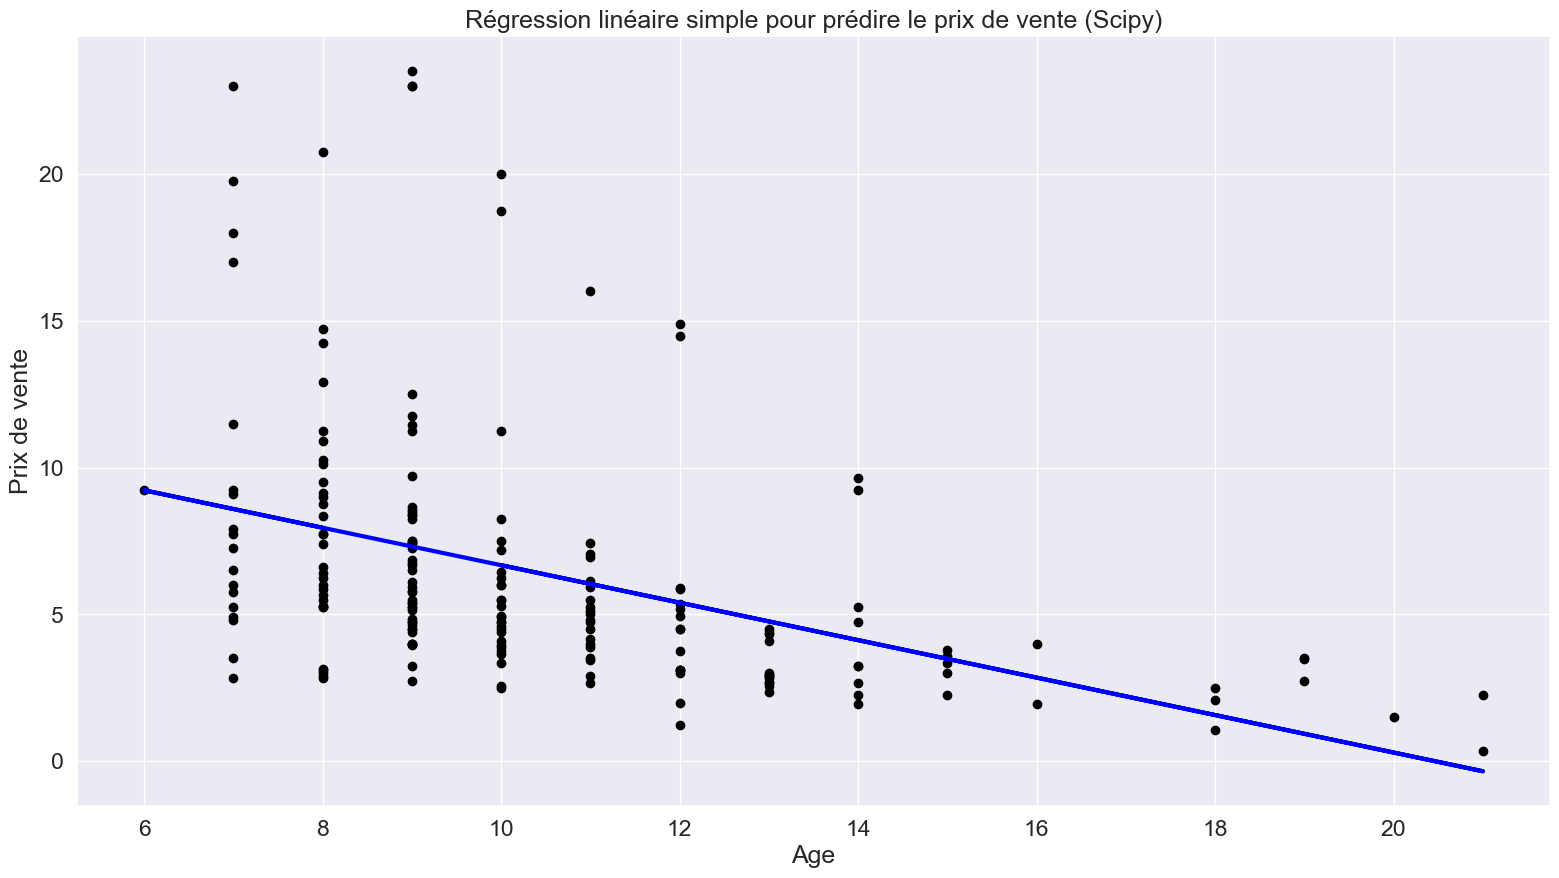

In [36]:
# afficher les valeurs prédites
plt.figure(figsize=(19, 10))
plt.scatter(cars['Age'], cars['Selling_Price'], color='black')
plt.plot(cars['Age'], intercept + slope*cars['Age'], color='blue', linewidth=3)
plt.title('Régression linéaire simple pour prédire le prix de vente (Scipy)')
plt.xlabel('Age')
plt.ylabel('Prix de vente')
plt.show()

### 5.2 Scikit-learn : 

In [37]:
model = LinearRegression()

In [38]:
# diviser le dataset en variables indépendantes et dépendantes
X = cars[['Age']]
y = cars['Selling_Price']

In [39]:
# diviser le dataset en training et testing
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# entraîner le modèle
model.fit(X_train, y_train)
# prédire les valeurs
y_pred = model.predict(X_test)

In [41]:
# prédire les valeurs
y_pred = model.predict(X_test)

In [42]:
print('Coef (slope): ', model.coef_[0])
print('Ordonnée à l\'origine (intercept): ', model.intercept_)
print('Coefficient de détermination (R-squared): %.2f'
      % sk.metrics.r2_score(y_test, y_pred))
print('Moindre carré (least square): %.2f'
        % np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))
print('Erreur quadratique moyenne (MSE): %.2f'
        % mean_squared_error(y_test, y_pred))
# afficher le coefficient de corrélation
print('Coefficient de corrélation: %.2f'
        % np.corrcoef(y_test, y_pred)[0, 1])



# afficher le score rmse
print('Score RMSE: %.2f'
        % np.sqrt(np.mean((y_pred - y_test)**2)))


Coef (slope):  -0.6361369146703338
Ordonnée à l'origine (intercept):  13.221064449591086
Coefficient de détermination (R-squared): 0.15
Moindre carré (least square): 3.26
Erreur quadratique moyenne (MSE): 10.65
Coefficient de corrélation: 0.46
Score RMSE: 3.26


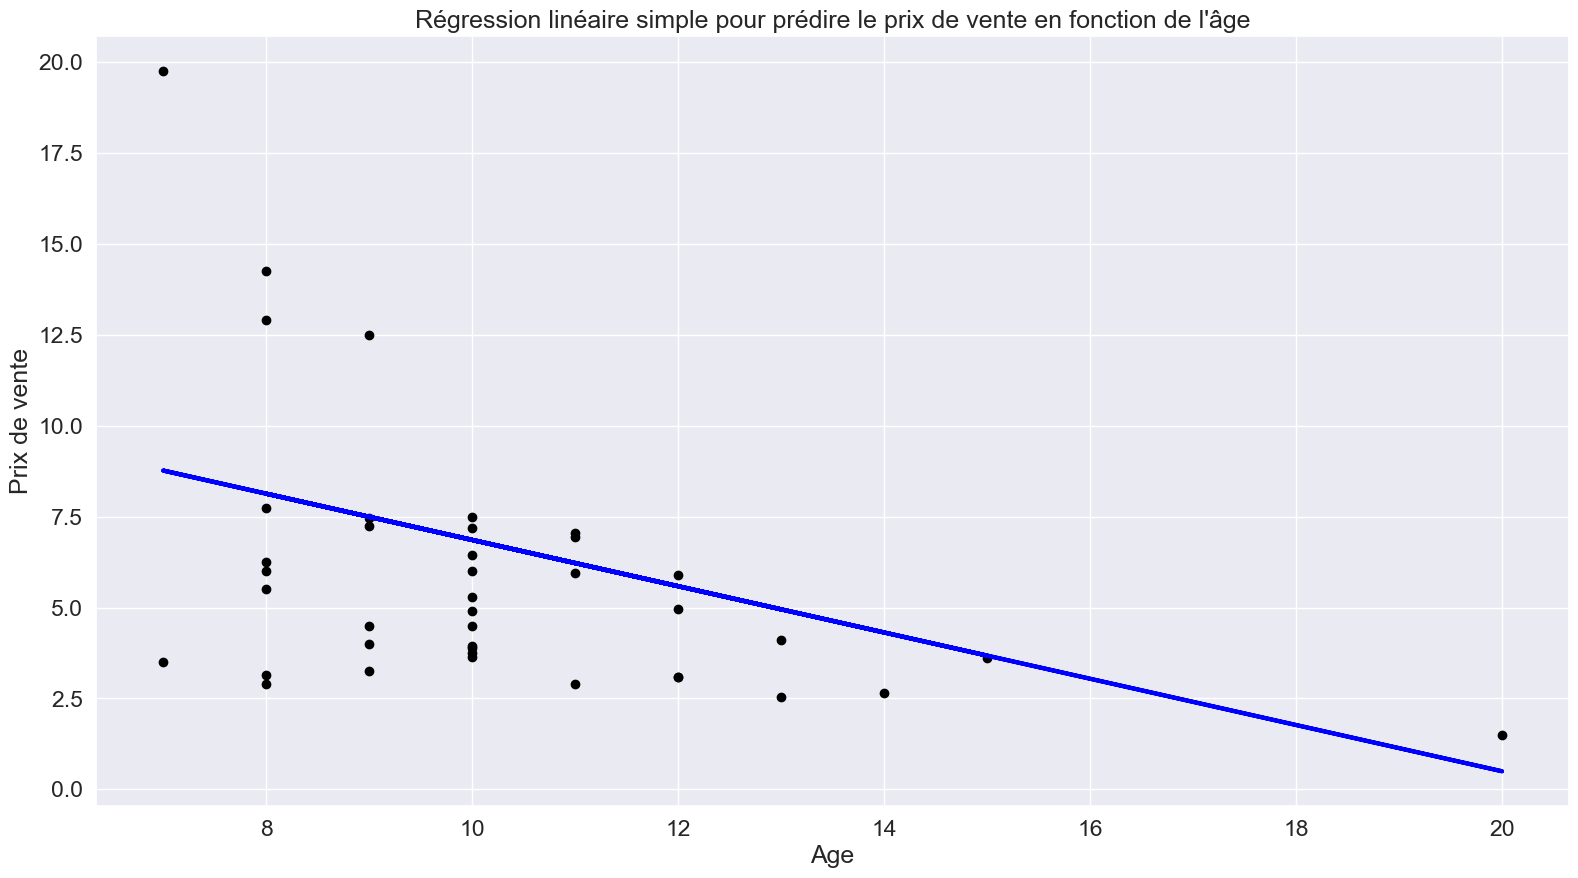

In [43]:
# afficher les valeurs prédites
plt.figure(figsize=(19, 10))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Régression linéaire simple pour prédire le prix de vente en fonction de l\'âge')
plt.xlabel('Age')
plt.ylabel('Prix de vente')
plt.show()

# 6. Amélioration du modèle en utilisant plusieurs variables d'entrée : Régression linéaire multiple
    sklearn : régression linéaire multiple pour prédire le prix de vente d'une voiture en fonction de son âge, de son kilométrage et de son type de transmission

In [44]:
X = cars[['Age', 'Kms_Driven', 'Transmission']]
y = cars['Selling_Price']

In [45]:
# encoder les variables catégorielles
X = pd.get_dummies(X, drop_first=True)

In [46]:
# diviser le dataset en training et testing
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# entraîner le modèle
model.fit(X_train, y_train)
# prédire les valeurs
y_pred = model.predict(X_test)

In [48]:
# afficher les coefficients
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Coefficient of determination: %.2f'
      % sk.metrics.r2_score(y_test, y_pred))
print('Moindre carré (least square): %.2f'
        % np.sqrt(sk.metrics.mean_squared_error(y_test, y_pred)))
print('Erreur quadratique moyenne (MSE): %.2f'
        % mean_squared_error(y_test, y_pred))
# afficher le coefficient de corrélation
print('Coefficient de corrélation: %.2f'
        % np.corrcoef(y_test, y_pred)[0, 1])


# afficher le score rmse
print('Score RMSE: %.2f'
        % np.sqrt(np.mean((y_pred - y_test)**2)))

Coefficients: 
 [-8.27654117e-01  3.50819973e-05 -5.60980766e+00]
Intercept: 
 18.464345210734955
Coefficient of determination: 0.28
Moindre carré (least square): 3.00
Erreur quadratique moyenne (MSE): 8.98
Coefficient de corrélation: 0.56
Score RMSE: 3.00


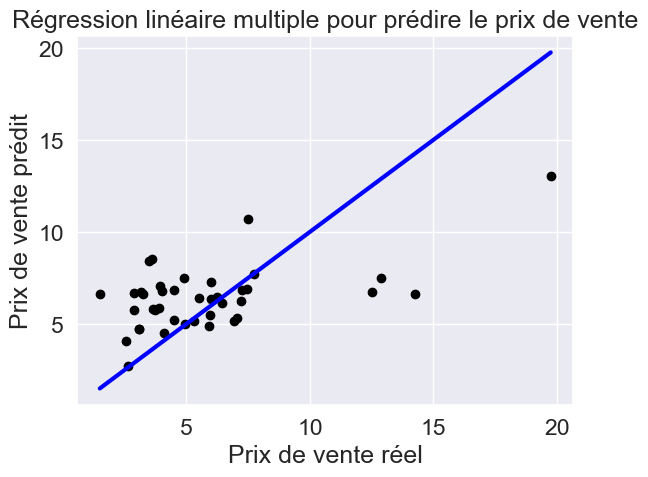

In [49]:
# afficher les valeurs prédites
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=3)
plt.title('Régression linéaire multiple pour prédire le prix de vente')
plt.xlabel('Prix de vente réel')
plt.ylabel('Prix de vente prédit')
plt.show()

# 7. Évaluation des modèles de régression linéaire à l'aide de mesures de qualité
    - 1. Le coefficient de déterminantion (R²)
    - 2. L'erreur quadratique moyenne (EQM)
    - 3. Le coefficient de corrélation (R)
    - 4. Le score RMSE

### 7.1 Le coefficient de déterminantion (R²)

Le coefficient de déterminantion (R²) mesure la proportion de la variance de la variable dépendante qui est expliquée par le modèle de régression.   
Il varie entre 0 et 1, plus il est proche de 1, meilleur est le modèle.

Régression linéaire univariée = 0.15   
Régression linéaire multivariée = 0.28

### 7.2 L'erreur quadratique moyenne (EQM)

L'erreur quadratique moyenne mesure l'écart moyen entre les valeurs prédites par le modèle et les vraies valeurs.   
Plus elle est faibre, meilleur est le modèle.

Régression linéaire univariée = 10.65   
Régression linéaire multivariée = 8.98

### 7.3 Le coefficient de corrélation (R)

Le coefficient de corrélation mesure la force de la relation linéaire entre la variable dépendante et indépendante.   
Il varie entre -1 et 1, plus il est proche de 1 ou -1, meilleure est la corrélation.

Régression linéaire univariée = 0.46   
Régression linéaire multivariée = 0.56

### 7.4 Le score RMSE

Le RMSE (Root Mean Square Error) est une métrique qui nous indique la racine carrée de la différence quadratique moyenne entre les valeurs prédites et les valeurs réelles dans un ensemble de données.   
Plus le RMSE est bas, mieux un modèle s'adapte à un ensemble de données.

Régression linéaire univariée = 3.26   
Régression linéaire multivariée = 3.00

# 8. Conclusion de l'analyse

Nous constatons une différence entre les scores du modèle multivarié par rapport au modèle univiarié.   
En effet, l'ajout de features (variables d'entrée) à notre modèle initial permet d'optimiser ce dernier.   
Dans notre cas, à l'âge du véhicule, nous y avons ajouté son kilométrage ainsi que son type de trasmission.    
Ce modèle a une précision de 0.28 et un score RMSE de 3.   

Il est important de noter que le prix de vente d'une voiture dépend de plusieurs facteurs et que la régression linéaire simple ne suffit pas pour prédire avec précision le prix de vente d'une voiture.   
D'autres modèles plus complexes peuvent être utilisés pour améliorer la précision des prédictions.   

En conclusion, l'analyse des données a permis de mettre en évidence les relations entre les différentes variables et de prédire le prix de vente d'une voiture en fonction de ces variables.

# 9. Cas Pratique : Martin
    Martin est à la recherche d'une voiture d'occasion, il cherche un véhicule de moins de 7 ans, avec un kilométrage inférieur à 100 000 km et une boite manuelle.

In [50]:
# Paramètres de recherche de Martin
age = 5
kms_driven = 50000
transmission = 1

In [51]:
price = model.predict([[age, kms_driven, transmission]])

C:\Users\rouis\anaconda3\envs\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:

print(f'La prédiction du prix de vente de la voiture idéale pour Martin est de %2.2f' % price[0])

La prédiction du prix de vente de la voiture idéale pour Martin est de 10.47
